In [9]:
import torch
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 将font.family改为New Roman
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 38}
plt.rcParams['font.sans-serif'] = [font['family']]
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = font['size']
plt.rcParams['font.weight'] = font['weight']

cora_dataset = Planetoid("./data/cora", "cora", transform=T.NormalizeFeatures())
data_cora = cora_dataset[0]
cora_feat = data_cora.x.cpu().numpy()
cora_labels = data_cora.y.cpu().numpy()

methods = ["Center", "KCenter", "KMeans", "Random"]

data = {}
for key in methods:
    data[key] = {}
    idx = np.load(f"./t_sne/sample/idx_cora_0.05_{key}.npy")
    data[key]["feat"] = cora_feat[idx]

all_feats = np.concatenate([cora_feat] + [data[key]["feat"] for key in methods], axis=0)

class_labels = np.concatenate(
    [cora_labels] + [np.full(data[key]["feat"].shape[0], -1) for key in methods], axis=0
)
method_labels = np.concatenate(
    [np.full(cora_feat.shape[0], 0)]
    + [np.full(data[key]["feat"].shape[0], i + 1) for i, key in enumerate(methods)],
    axis=0,
)

tsne = TSNE(n_components=2, random_state=42)
all_tsne = tsne.fit_transform(all_feats)

cora_tsne = all_tsne[: cora_feat.shape[0]]
tsne_results = {}
start_idx = cora_feat.shape[0]
for i, key in enumerate(methods):
    end_idx = start_idx + data[key]["feat"].shape[0]
    tsne_results[key] = all_tsne[start_idx:end_idx]
    start_idx = end_idx


np.save("t_sne/sample/tsne_cora.npy", cora_tsne)
np.save("t_sne/sample/cora_labels.npy", cora_labels)
np.save("t_sne/sample/tsne_results.npy", tsne_results)
np.save("t_sne/sample/class_labels.npy", class_labels)
np.save("t_sne/sample/method_labels.npy", method_labels)
np.save("t_sne/sample/all_tsne.npy", all_tsne)

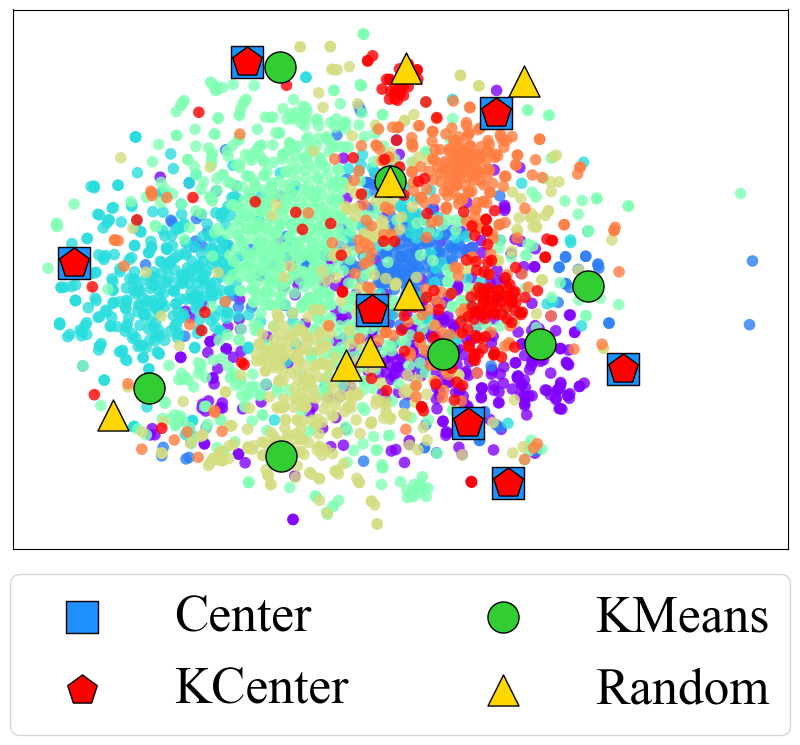

In [73]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 将font.family改为New Roman
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 38}
plt.rcParams['font.sans-serif'] = [font['family']]
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = font['size']
plt.rcParams['font.weight'] = font['weight']

cora_tsne = np.load("t_sne/sample/tsne_cora.npy")
tsne_results = np.load("t_sne/sample/tsne_results.npy", allow_pickle=True).item()
class_labels = np.load("t_sne/sample/class_labels.npy")
method_labels = np.load("t_sne/sample/method_labels.npy")
all_tsne = np.load("t_sne/sample/all_tsne.npy")
cora_labels = np.load("t_sne/sample/cora_labels.npy")
methods = ["Center", "KCenter", "KMeans", "Random"]

plt.figure(figsize=(10, 7))
markers = {"Center": "s", "KCenter": "p", "KMeans": "o", "Random": "^"}
# colors = {
#     "Center": "#00552e",
#     "KCenter": "#928a97",
#     "KMeans": "#fecea8",
#     "Random": "#f85f73",
# }
colors = ['#FF0000', '#1E90FF', '#32CD32', '#FFD700']
colors = {
    "Center": "#1E90FF",
    "KCenter": "#FF0000",
    "KMeans": "#32CD32",
    "Random": "#FFD700",
}

# colors = [
#     "#14517C",
#     "#2F7FC1",
#     "#96C37D",
#     "#F3D266",
#     "#C497B2",
#     "#D8383A",
#     "#A1A9D0",
# ]
num_labels = len(set(cora_labels))
cora_colors = plt.cm.rainbow(np.linspace(0, 1, num_labels))
for label in range(num_labels):
    indices = (class_labels == label) & (method_labels == 0)
    plt.scatter(
        all_tsne[indices, 0],
        all_tsne[indices, 1],
        c=[cora_colors[label]],
        alpha=0.8,
        s=70,
        edgecolors="None",
    )

for i, key in enumerate(methods):
    indices = method_labels == (i + 1)
    plt.scatter(
        all_tsne[indices, 0],
        all_tsne[indices, 1],
        marker=markers[key],
        color=colors[key],
        label=key,
        s=500,
        alpha=1,
        edgecolors="black",
    )

plt.xticks([])
plt.yticks([])
# plt.legend(loc="best")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 0.0), ncol=2, fontsize=37)
plt.savefig("../figs/Initialization.pdf", bbox_inches="tight")
plt.show()

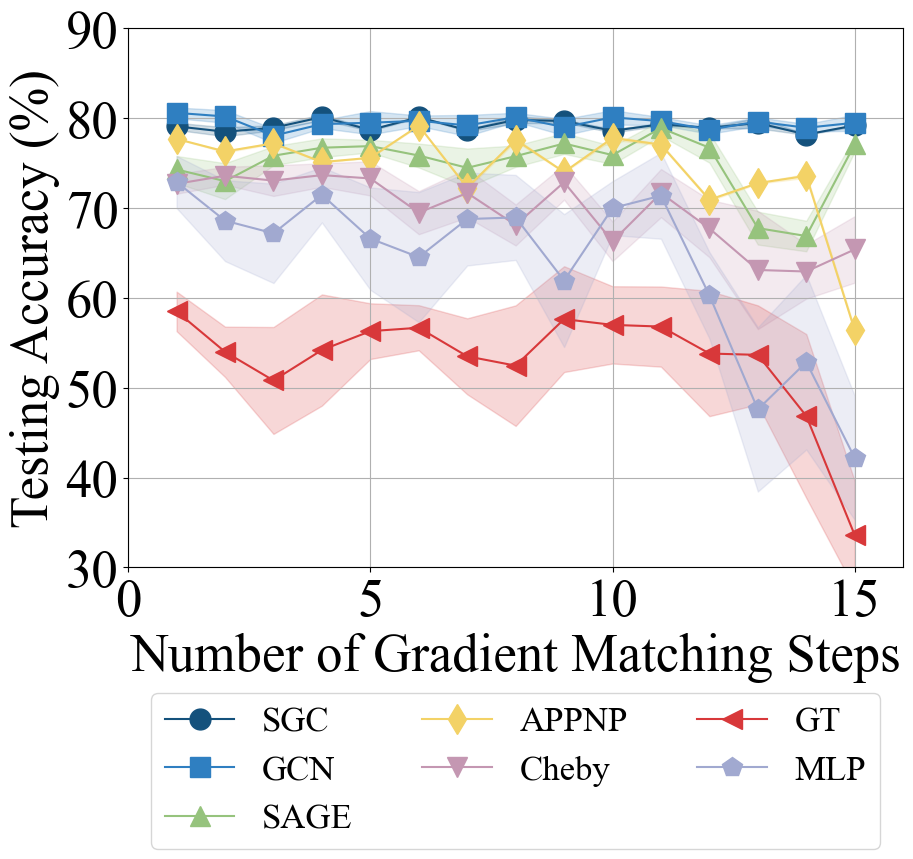

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 将font.family改为New Roman
font = {'family': 'Times New Roman', 'weight': 'normal', 'size': 38}
plt.rcParams['font.sans-serif'] = [font['family']]
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = font['size']
plt.rcParams['font.weight'] = font['weight']
plt.figure(figsize=(10, 7))
outer_loop = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

SGC = np.array(
    [
        79.1,
        78.5,
        78.94,
        80.13,
        78.7,
        80.11,
        78.67,
        79.82,
        79.69,
        78.6,
        79.33,
        78.94,
        79.47,
        78.19,
        79.2,
    ]
)
SGC_std = np.array(
    [0.4, 0.5, 0.28, 0.32, 0.1, 0.05, 0.09, 0.4, 0.17, 0.2, 0.14, 0.05, 0.59, 0.05, 0.1]
)

GCN = np.array(
    [
        80.6,
        80.2,
        78.06,
        79.35,
        79.5,
        79.72,
        79.2,
        80.12,
        79.01,
        80.1,
        79.68,
        78.74,
        79.63,
        78.94,
        79.5,
    ]
)
GCN_std = np.array(
    [0.6, 0.7, 0.8, 0.44, 1.3, 0.59, 1.17, 0.49, 0.91, 0.8, 0.45, 0.47, 0.48, 0.42, 0.9]
)

SAGE = np.array(
    [
        74.3,
        73,
        75.83,
        76.72,
        76.9,
        75.85,
        74.48,
        75.78,
        77.19,
        75.9,
        78.91,
        76.72,
        67.77,
        66.89,
        77.1,
    ]
)
SAGE_std = np.array(
    [1.5, 2.0, 1.06, 1.04, 0.7, 1.33, 2.15, 1.19, 1.16, 1.0, 0.85, 1.66, 1.83, 1.7, 0.8]
)

APPNP = np.array(
    [
        77.7,
        76.3,
        77.21,
        75.12,
        75.6,
        79.18,
        72.27,
        77.6,
        74.01,
        77.8,
        77.07,
        70.93,
        72.78,
        73.59,
        56.4,
    ]
)
APPNP_std = np.array(
    [
        0.0,
        0.1,
        0.07,
        0.06,
        0.0,
        0.04,
        0.11,
        0.19,
        0.05,
        0.2,
        0.11,
        0.13,
        0.06,
        0.22,
        0.2,
    ]
)

Cheby = np.array(
    [
        72.7,
        73.6,
        73.06,
        73.67,
        73.3,
        69.49,
        71.68,
        68.12,
        72.88,
        66.3,
        71.67,
        67.73,
        63.11,
        62.94,
        65.4,
    ]
)
Cheby_std = np.array(
    [1.1, 1.0, 1.71, 1.31, 1.9, 2.4, 2.71, 2.28, 1.94, 2.2, 2.68, 3.2, 6.58, 3.02, 3.7]
)

GT = np.array(
    [
        58.5,
        54.0,
        50.81,
        54.2,
        56.3,
        56.68,
        53.5,
        52.46,
        57.64,
        57.0,
        56.81,
        53.81,
        53.66,
        46.86,
        33.6,
    ]
)
GT_std = np.array(
    [
        2.2,
        2.8,
        5.95,
        6.19,
        3.1,
        2.51,
        4.23,
        6.71,
        5.89,
        4.3,
        4.46,
        6.97,
        5.51,
        9.12,
        6.0,
    ]
)

MLP = np.array(
    [
        72.9,
        68.6,
        67.19,
        71.48,
        66.6,
        64.54,
        68.78,
        68.96,
        61.93,
        70.0,
        71.38,
        60.29,
        47.59,
        52.85,
        42.2,
    ]
)
MLP_std = np.array(
    [2.9, 4.5, 5.53, 3.08, 5.7, 7.24, 5.17, 4.73, 7.4, 3.0, 4.79, 4.81, 9.14, 9.72, 6.9]
)


colors = [
    "#14517C",
    "#2F7FC1",
    "#96C37D",
    "#F3D266",
    "#C497B2",
    "#D8383A",
    "#A1A9D0",
]

markersize = 15
plt.plot(outer_loop, SGC, "-o", label="SGC", color=colors[0], markersize=markersize)
plt.fill_between(outer_loop, SGC - SGC_std, SGC + SGC_std, color=colors[0], alpha=0.2)

plt.plot(outer_loop, GCN, "-s", label="GCN", color=colors[1], markersize=markersize)
plt.fill_between(outer_loop, GCN - GCN_std, GCN + GCN_std, color=colors[1], alpha=0.2)

plt.plot(outer_loop, SAGE, "-^", label="SAGE", color=colors[2], markersize=markersize)
plt.fill_between(
    outer_loop, SAGE - SAGE_std, SAGE + SAGE_std, color=colors[2], alpha=0.2
)

plt.plot(outer_loop, APPNP, "-d", label="APPNP", color=colors[3], markersize=markersize)
plt.fill_between(
    outer_loop, APPNP - APPNP_std, APPNP + APPNP_std, color=colors[3], alpha=0.2
)

plt.plot(outer_loop, Cheby, "-v", label="Cheby", color=colors[4], markersize=markersize)
plt.fill_between(
    outer_loop, Cheby - Cheby_std, Cheby + Cheby_std, color=colors[4], alpha=0.2
)

plt.plot(outer_loop, GT, "-<", label="GT", color=colors[5], markersize=markersize)
plt.fill_between(outer_loop, GT - GT_std, GT + GT_std, color=colors[5], alpha=0.2)

plt.plot(outer_loop, MLP, "-p", label="MLP", color=colors[6], markersize=markersize)
plt.fill_between(outer_loop, MLP - MLP_std, MLP + MLP_std, color=colors[6], alpha=0.2)

plt.xlabel("Number of Gradient Matching Steps")
plt.ylabel("Testing Accuracy (%)")
# plt.legend()
plt.yticks(np.arange(30, 91, 10))
plt.xticks([0, 5, 10, 15])
plt.xlim((0, 16))
plt.ylim((30, 90))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=25)
plt.grid(True)
# plt.show()
plt.savefig("../figs/match_step.pdf", bbox_inches="tight")


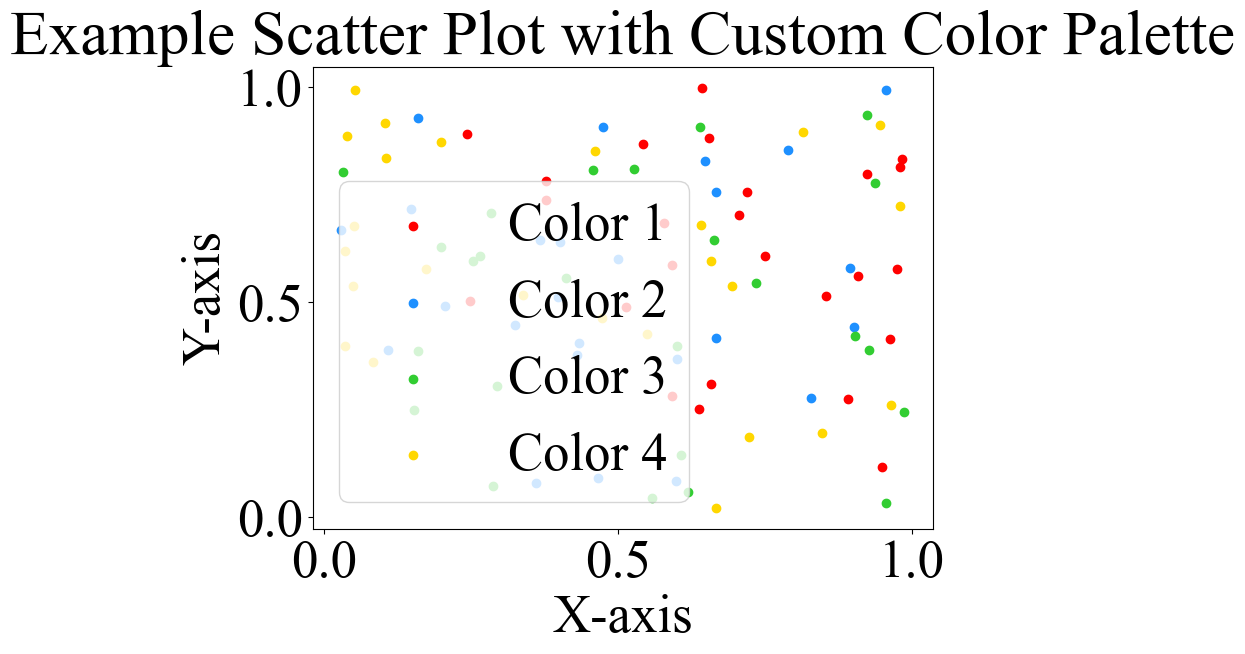

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# 定义包含红色和其他三种颜色的调色盘
colors = ['#FF0000', '#1E90FF', '#32CD32', '#FFD700']  # 红色、道奇蓝、绿黄色、金色

# 创建一些示例数据
x = np.random.rand(100)
y = np.random.rand(100)

plt.figure(figsize=(8, 6))

# 分成四组，每组使用一种颜色
for i, color in enumerate(colors):
    plt.scatter(x[i*25:(i+1)*25], y[i*25:(i+1)*25], color=color, label=f'Color {i+1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Example Scatter Plot with Custom Color Palette')
plt.legend()
plt.show()